## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Explore the Data

In [3]:
df_temp = pd.read_csv("Datasets/temperature_change_data_11-29-2021.csv")
df_temp.head(10)

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data
5,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1966,1966,°C,1.969,Fc,Calculated data
6,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1967,1967,°C,-0.499,Fc,Calculated data
7,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1968,1968,°C,-0.675,Fc,Calculated data
8,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1969,1969,°C,-1.792,Fc,Calculated data
9,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1970,1970,°C,1.534,Fc,Calculated data


In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67625 entries, 0 to 67624
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       67625 non-null  object 
 1   Domain            67625 non-null  object 
 2   Area Code (ISO3)  67625 non-null  object 
 3   Area              67625 non-null  object 
 4   Element Code      67625 non-null  int64  
 5   Element           67625 non-null  object 
 6   Months Code       67625 non-null  int64  
 7   Months            67625 non-null  object 
 8   Year Code         67625 non-null  int64  
 9   Year              67625 non-null  int64  
 10  Unit              67625 non-null  object 
 11  Value             65331 non-null  float64
 12  Flag              67625 non-null  object 
 13  Flag Description  67625 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 7.2+ MB


In [4]:
df_temp.describe()

,Element Code,Months Code,Year Code,Year,Value
count,67625.0,67625.000000,67625.000000,67625.000000,65331.000000
mean,7271.0,7018.000000,1991.306248,1991.306248,0.491524
std,0.0,1.414224,17.333343,17.333343,0.820116
min,7271.0,7016.000000,1961.000000,1961.000000,-5.979000
25%,7271.0,7017.000000,1976.000000,1976.000000,-0.011000
50%,7271.0,7018.000000,1992.000000,1992.000000,0.410000
75%,7271.0,7019.000000,2006.000000,2006.000000,0.932000
max,7271.0,7020.000000,2020.000000,2020.000000,8.206000


In [8]:
df_temp.shape

(67625, 14)

## Analyzing Data

In [5]:
df_temp['Area'].value_counts()

Area
Afghanistan              300
Norfolk Island           300
Namibia                  300
Nauru                    300
Nepal                    300
                        ... 
Montenegro                75
Serbia                    75
Serbia and Montenegro     70
Sudan                     50
South Sudan               50
Name: count, Length: 247, dtype: int64

In [14]:
df_temp.isnull().sum().sum()

2294

In [13]:
a = df_temp.isnull().sum().sum()
a/df_temp.shape[0]*100

3.392236598890943

## Preparing Data

In [22]:
country = ["China", "Germany", "Japan", "United States of America"]
evolution = df_temp[(df_temp["Flag Description"] != "Data Not Available") &
                    (df_temp["Months"] == "Meteorological year") & 
                    (df_temp["Area"].isin(country))].reset_index(drop=True)
evolution["Area"] = evolution["Area"].replace(to_replace=["United States of America"],value=["United States"])
evolution = evolution.groupby(["Area", "Year"])["Value"].mean().reset_index()
evolution.head(10)

,Area,Year,Value
0,China,1961,0.266
1,China,1962,-0.134
2,China,1963,0.292
3,China,1964,-0.020
4,China,1965,0.081
5,China,1966,0.181
6,China,1967,-0.283
7,China,1968,-0.410
8,China,1969,-0.215
9,China,1970,-0.307


## Data Visualization

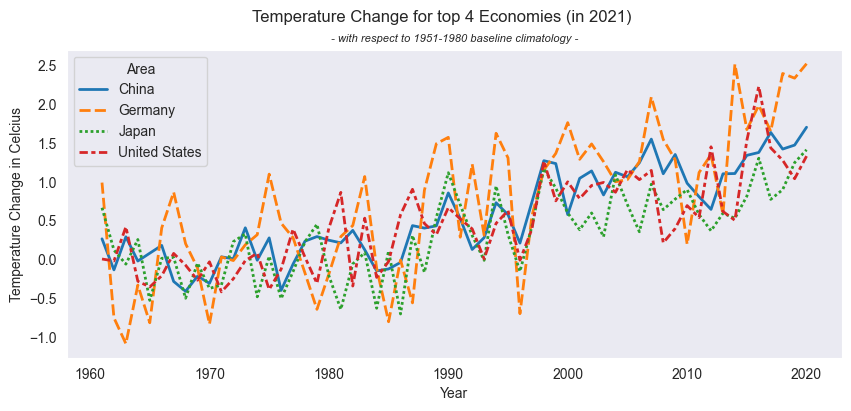

In [54]:
plt.figure(figsize=(10,4))
sns.lineplot(data=evolution, x="Year", y="Value",hue="Area",style="Area",lw=2)
plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=12)
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=8, style="italic")
plt.xlabel("Year")
plt.ylabel("Temperature Change in Celcius")
plt.xticks()
plt.yticks()
plt.grid(False)
plt.show()

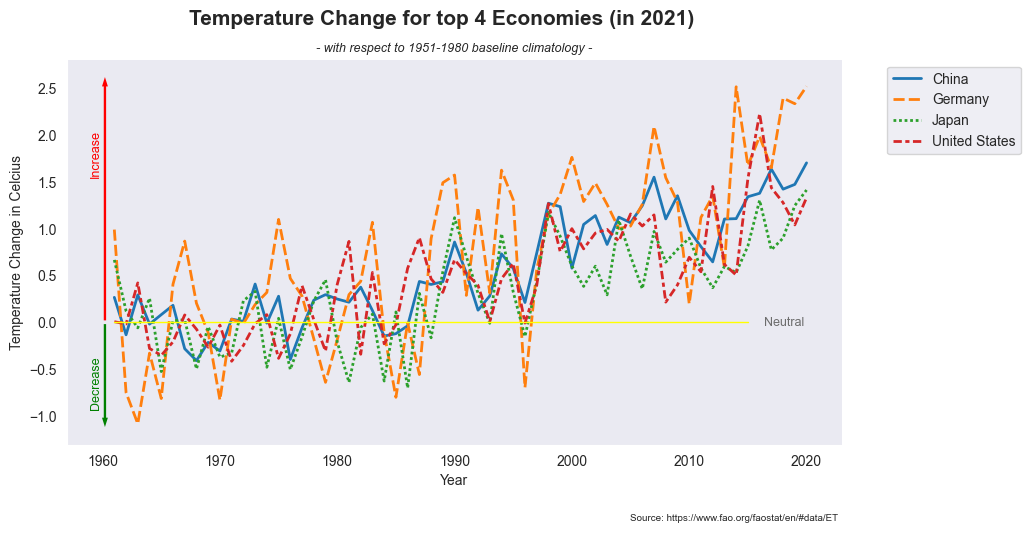

In [51]:
plt.figure(figsize=(10,5))
line = sns.lineplot(data=evolution, x="Year", y="Value",hue="Area",style="Area",lw=2)
plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=15, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=9, style="italic")
plt.xlabel("Year")
plt.ylabel("Temperature Change in Celcius")
leg = line.legend(fontsize=10, bbox_to_anchor= (1.05,1))
for legend_line in leg.get_lines():
    legend_line.set_linewidth(2)
plt.xticks()
plt.yticks()
plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.arrow(x=1960.2, y=0.02, dx=0, dy=2.5, width=0.2, head_width=0.5, head_length=0.1,facecolor='red', edgecolor='none')
plt.arrow(x=1960.2, y=-0.02, dx=0, dy=-1, width=0.2, head_width=0.5, head_length=0.1,facecolor='green', edgecolor='none')
plt.plot([1961, 2015], [0.0, 0.0], lw=1, color='yellow')
plt.text(0.03, 0.7, 'Increase', fontsize=9, color='red',rotation="vertical", transform=line.transAxes)
plt.text(0.03, 0.1, 'Decrease', fontsize=9, color='green',rotation="vertical", transform=line.transAxes)
plt.text(0.9, 0.31, 'Neutral', fontsize=9, color='#6D6D6D',rotation="horizontal", transform=line.transAxes)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0.87,0), (-80,-50), fontsize=7, xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()